In [5]:
load("quivers.sage")

## think the 1 forkless part due to iso morphism are special cases of something
## idk what I was trying to show here, ignore this
n = 5
m = 2
mp = 5
Q = Quiver(matrix(([0, n,-m,m,-n,n],
                   [-n,0, n,-m,m,-n],
                   [m,-n, 0,n,-m,m],
                   [-m,m,-n,0, n,-m],
                   [n,-m,m,-n,0, n],
                   [-n,n,-m,m,-n, 0])))

print(isFork(Q.matrix))
for i in [1..6]:
    print(isFork(Q.mutate([i]).matrix))

0
0
0
0
0
0
0


In [1]:
load("quivers.sage")
## looking into the 2 forkless part with no source or sink
## works for n > 2
n = 5
sides = [100,100,100,100,100,100]
for i in [0..5]:
    sides[i] = n

sides[1] = 3 ## unsure how this affects forkless part in combo with n, but can work, generally if n >=
sides[5] = (sides[1] - 1)*n

Q = Quiver(matrix(([0, sides[0],-sides[1], sides[4]],
                   [-sides[0],0, sides[2],-sides[3]],
                   [sides[1],-sides[2], 0,  -sides[5]],
                   [-sides[4],sides[3],sides[5],  0])))

print(isFork(Q.matrix))
for i in [1..4]:
    print(i, isFork(Q.mutate([i]).matrix))
    print(Q.mutate([i]).matrix)
    if i == 1:
        Qmu1 = Q.mutate([i])
        for j in [2..4]:
            print(1,j,isFork(Qmu1.mutate([j]).matrix))
            print(Qmu1.mutate([j]).matrix)

#print()
#print(Q.mutate([1]).matrix)
#print()
#print(Q.matrix)
Qp = Q.mutate([1]).matrix
Qp = swapNodes(Qp, 2, 4)
Qp = -1 * Qp

print(Qp == Q.matrix)

0
1 0
[  0  -5   3  -5]
[  5   0 -10  -5]
[ -3  10   0   5]
[  5   5  -5   0]
1 2 2
[  0   5 -47 -30]
[ -5   0  10   5]
[ 47 -10   0   5]
[ 30  -5  -5   0]
1 3 3
[  0  25  -3  10]
[-25   0  10  -5]
[  3 -10   0  -5]
[-10   5   5   0]
1 4 4
[  0  -5 -22   5]
[  5   0 -35   5]
[ 22  35   0  -5]
[ -5  -5   5   0]
2 2
[  0  -5  22   5]
[  5   0  -5   5]
[-22   5   0 -35]
[ -5  -5  35   0]
3 3
[  0 -10   3 -25]
[ 10   0  -5  -5]
[ -3   5   0  10]
[ 25   5 -10   0]
4 4
[  0  30  47  -5]
[-30   0   5   5]
[-47  -5   0  10]
[  5  -5 -10   0]
True


In [20]:
load("quivers.sage")
## trying to expand to 5 nodes
n = 5
sides = [100,100,100,100,100,100]
for i in [0..5]:
    sides[i] = n

sides[1] = 3
sides[5] = (sides[1] - 1)*n

Q = Quiver(matrix(([0, sides[0],-sides[1], sides[4]],
                   [-sides[0],0, sides[2],-sides[3]],
                   [sides[1],-sides[2], 0,  -sides[5]],
                   [-sides[4],sides[3],sides[5],  0])))
construction = zero_matrix(5)
for i in [0..3]:
    for j in [0..3]:
        construction[i,j] = Q.matrix[i,j]


for bitVal in [1..16]:
    for i in [0..3]:
        dir = 1
        if (bitVal & (1 << (i))):
            dir = -1
        construction[i,4] = dir*n
        construction[4,i] = -1*dir*n
    Q = Quiver(construction)
    #print(Q.matrix[4])
    works = not(isFork(Q.matrix))
    for i in [1..5]:
        works = works and (isFork(Q.mutate([i]).matrix) != 0 or i == 1)
        if i == 1:
            Qmu1 = Q.mutate([i])
            for j in [2..5]:
                works = works and (isFork(Qmu1.mutate([j]).matrix) != 0)
    if works:
        print(bitVal,"Works\n", Q.matrix)

print("Done")

1 Works
 [  0   5  -3   5  -5]
[ -5   0   5  -5   5]
[  3  -5   0 -10   5]
[ -5   5  10   0   5]
[  5  -5  -5  -5   0]
4 Works
 [  0   5  -3   5   5]
[ -5   0   5  -5   5]
[  3  -5   0 -10  -5]
[ -5   5  10   0   5]
[ -5  -5   5  -5   0]
5 Works
 [  0   5  -3   5  -5]
[ -5   0   5  -5   5]
[  3  -5   0 -10  -5]
[ -5   5  10   0   5]
[  5  -5   5  -5   0]
6 Works
 [  0   5  -3   5   5]
[ -5   0   5  -5  -5]
[  3  -5   0 -10  -5]
[ -5   5  10   0   5]
[ -5   5   5  -5   0]
9 Works
 [  0   5  -3   5  -5]
[ -5   0   5  -5   5]
[  3  -5   0 -10   5]
[ -5   5  10   0  -5]
[  5  -5  -5   5   0]
10 Works
 [  0   5  -3   5   5]
[ -5   0   5  -5  -5]
[  3  -5   0 -10   5]
[ -5   5  10   0  -5]
[ -5   5  -5   5   0]
11 Works
 [  0   5  -3   5  -5]
[ -5   0   5  -5  -5]
[  3  -5   0 -10   5]
[ -5   5  10   0  -5]
[  5   5  -5   5   0]
14 Works
 [  0   5  -3   5   5]
[ -5   0   5  -5  -5]
[  3  -5   0 -10  -5]
[ -5   5  10   0  -5]
[ -5   5   5   5   0]
Done


In [23]:
load("quivers.sage")
## trying to expand to 5 nodes
n = 5
sides = [100,100,100,100,100,100]
for i in [0..5]:
    sides[i] = n

sides[1] = 6
sides[5] = (sides[1] - 1)*n

Q = Quiver(matrix(([0, sides[0],-sides[1], sides[4]],
                   [-sides[0],0, sides[2],-sides[3]],
                   [sides[1],-sides[2], 0,  -sides[5]],
                   [-sides[4],sides[3],sides[5],  0])))

setOfWorking = constructionOf2ForklessPart(Q, n, True)

while True:
    sixNode = constructionOf2ForklessPart(setOfWorking[0], n, True)
    if(len(sixNode) != 0):
        # print(sixNode[0].matrix)
        setOfWorking = [sixNode[0]]
        print("Works For", sixNode[0].matrix.ncols())
        print(sixNode[0].matrix)
        if(sixNode[0].matrix.ncols() >= 20):
            break
    else:
        break

print("Done")

1
1
Works For 6
[  0   5  -6   5  -5  -5]
[ -5   0   5  -5   5   5]
[  6  -5   0 -25   5   5]
[ -5   5  25   0   5   5]
[  5  -5  -5  -5   0   5]
[  5  -5  -5  -5  -5   0]
1
Works For 7
[  0   5  -6   5  -5  -5  -5]
[ -5   0   5  -5   5   5   5]
[  6  -5   0 -25   5   5   5]
[ -5   5  25   0   5   5   5]
[  5  -5  -5  -5   0   5   5]
[  5  -5  -5  -5  -5   0   5]
[  5  -5  -5  -5  -5  -5   0]
1
Works For 8
[  0   5  -6   5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5]
[ -5   5  25   0   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5]
[  5  -5  -5  -5  -5   0   5   5]
[  5  -5  -5  -5  -5  -5   0   5]
[  5  -5  -5  -5  -5  -5  -5   0]
1
Works For 9
[  0   5  -6   5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5]


1
Works For 11
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0]
1
Works For 12
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5]
[  5  -5  -5  

1
Works For 13
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0]


1
Works For 14
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0]


1
Works For 15
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0]


1
Works For 16
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0 

1
Works For 17
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5]
[  5 

1
Works For 18
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5]
[  5  -5  -5  -5  -5  -

1
Works For 19
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5 

1
Works For 20
[  0   5  -6   5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5]
[ -5   0   5  -5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  6  -5   0 -25   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[ -5   5  25   0   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5   5]
[  5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5   0   5   5   5   5   5   5   5   5]
[

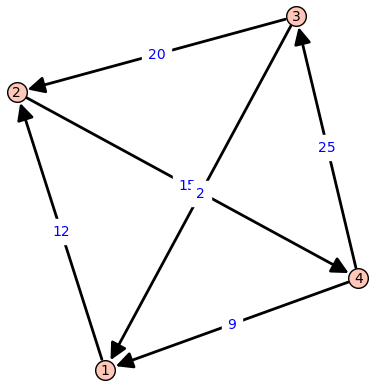

0
1
2
3
4


In [4]:
load("quivers.sage")
## looking for 1 forkless part with both 3 cycles 0 non fork
## done

Q = Quiver(matrix(([0, 12, -2, -9],
                   [-12, 0, -20, 15],
                   [2, 20, 0, -25],
                   [9, -15, 25, 0])))
displayQuiver(Q.matrix)
print(isFork(Q.matrix))
for i in [1..4]:
    print(isFork(Q.mutate([i]).matrix))

In [17]:
## brute force finding 4 node 2 forkless part for structures without a source or sink
## DONT RUN VERY INEFFICENT, but works :)
## Ran when ending so not wasting time
maxSide = 20
side = [2,2,2,2,2,2]
setOf1Forkless = []
while(side[0] < maxSide):
    Q1 = Quiver(matrix(([0, side[0], -1*side[1], side[2]],
                        [-1*side[0], 0, side[3], -1*side[4]],
                        [side[1], -1*side[3], 0, -1*side[5]],
                        [-1*side[2], side[4], side[5], 0])))
    Q2 = Quiver(matrix(([0, -1*side[0], -1*side[1], side[2]],
                        [side[0], 0, side[3], -1*side[4]],
                        [side[1], -1*side[3], 0, -1*side[5]],
                        [-1*side[2], side[4], side[5], 0])))
    if(isFork(Q1.matrix) == 0):
        nonForks = []
        for i in [1..4]:
            if(isFork(Q1.mutate([i]).matrix) == 0):
                nonForks.append(Q1.mutate([i]).matrix)
        if(len(nonForks) == 1):
            Qprime = Quiver(nonForks[0])
            nonForks = []
            for i in [1..4]:
                if(isFork(Qprime.mutate([i]).matrix) == 0):
                    nonForks.append(Qprime.mutate([i]).matrix)
            if(len(nonForks) == 1):
                setOf1Forkless.append([1, Q1.matrix])
    if(isFork(Q2.matrix) == 0):
        nonForks = []
        for i in [1..4]:
            if(isFork(Q2.mutate([i]).matrix) == 0):
                nonForks.append(Q2.mutate([i]).matrix)
        if(len(nonForks) == 1):
            Qprime = Quiver(nonForks[0])
            nonForks = []
            for i in [1..4]:
                if(isFork(Qprime.mutate([i]).matrix) == 0):
                    nonForks.append(Qprime.mutate([i]).matrix)
            if(len(nonForks) == 1):
                setOf1Forkless.append([1, Q2.matrix])
    i = 5
    side[i] += 1
    while(side[i] > maxSide):
        side[i] = 2
        i -= 1
        if(i >= 0):
            side[i] += 1
        else:
            break
    if(i == -1):
        break
print(len(setOf1Forkless))

0


In [4]:
#trying to see if 4 node 1 forkless part generalizes to all 3 0-forkless
# turns out is does, easy to brute force prove
# good code to keep for later

load("quivers.sage")
## looking for 1 forkless part with both 3 cycles 0 non fork
## done

#the 0 forkless sides in ascending order, want small name
a = [1000,1000,1001]

Q = Quiver(matrix(([0, a[0]*a[1], -2, -1*a[0]*a[0]],
                   [-1*a[0]*a[1], 0, -1*a[1]*a[2], a[2]*a[2]],
                   [2, a[1]*a[2], 0, -1*a[2]*a[2]],
                   [a[0]*a[0], -1*a[2]*a[2], a[2]*a[2], 0])))
print(Q.matrix)
print(isFork(Q.matrix))
for i in [1..4]:
    print(isFork(Q.mutate([i]).matrix))

[       0  1000000       -2 -1000000]
[-1000000        0 -1001000  1002001]
[       2  1001000        0 -1002001]
[ 1000000 -1002001  1002001        0]
0
1
2
3
4


In [2]:
#trying to see if 5 node 1 forkless part form like above


load("quivers.sage")
## looking for 1 forkless part with both 3 cycles 0 non fork
## done

#the 0 forkless sides in ascending order, want small name
a = [3,4,5]

Q = Quiver(matrix(([0, a[0]*a[1], -2, -1*a[0]*a[0], 2],
                   [-1*a[0]*a[1], 0, -1*a[1]*a[2], a[0]*a[2], -1*a[2]*a[2]],
                   [2, a[1]*a[2], 0, -1*a[2]*a[2], 2],
                   [a[0]*a[0], -1*a[0]*a[2], a[2]*a[2], 0, a[1]*a[2]],
                   [-2, a[2]*a[2], -2, -1*a[1]*a[2], 0])))
# print(Q.matrix)
print(isFork(Q.matrix))
for i in [1..5]:
    print(isFork(Q.mutate([i]).matrix))

0
1
2
3
4
5


In [4]:
#trying on 6 nodes
# difference is can try 'share' with only 2 of the 0 forkless and leave number 3 untouched, thus may not be as easy
    # this was actually unachievable in my testing, may be impossible to only induce a few cycle
# may want to make construction of only 0 forkless parts into 1 forkless
    # trying but hard to fit acyclic criteria, easy to get inequality case esp if all 3 cycles are 0 forkless part
    # how to enforce no cycles

#trying to see if 5 node 1 forkless part form like above


load("quivers.sage")
## looking for 1 forkless part with both 3 cycles 0 non fork
## done

#the 0 forkless sides in ascending order, want small name
a = [4,5,10]

Q = Quiver(matrix(([0, a[0]*a[1], -2, -1*a[0]*a[0], a[0], -1*a[1]],
                   [-1*a[0]*a[1], 0, -1*a[1]*a[2], a[0]*a[2], -1*a[2]*a[2], -1*a[0]*a[0]],
                   [2, a[1]*a[2], 0, -1*a[2]*a[2], a[0], -1*a[1]],
                   [a[0]*a[0], -1*a[0]*a[2], a[2]*a[2], 0, a[1]*a[2], a[0]*a[1]],
                   [-1*a[0], a[2]*a[2], -1*a[0], -1*a[1]*a[2], 0, -1*a[2]],
                   [a[1],a[0]*a[0], a[1], -1*a[0]*a[1], a[2], 0])))
# print(Q.matrix)
print(isFork(Q.matrix))
for i in [1..6]:
    print(isFork(Q.mutate([i]).matrix))

0
1
2
3
4
5
6


0
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


20
21
22
23
24
25
26
27
28
29
30
31
32
33


34
35
36
37
38
39
40
41


42
43
44
45
46
47
48
49
50


51
52
53
54
55
56
57
58


59
60
61
62
63
64
65


66
67
68
69
70
71


72
73
74
75
76
77


78
79
80


81
82
83
84
85


86
87
88
89
90


91
92
93
94
95


96
97
98
99


100
101
102
103


104
105
106
107


108
109
110
111


112
113
114
115


116
117
118
119


120
121
122
123


124
125
126


127
128
129
130
131


132
133
134


135
136
137


138
139
140


141
142


143
144
145


146
147
148


149
150
151


152
153


154
155
156


157


158
159


160
161
162


163
164
165


166
167
168


169
170
171


172


173
174


175
176
177


178
179


180
181


182
183


184
185


186
187


188
189
190


191
192


193


194
195


196
197


198
199


200
800/401


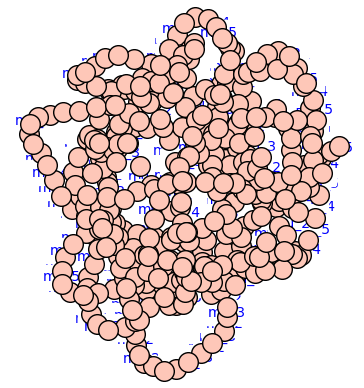

1
2
0
0
5


In [4]:
load("quivers.sage")
## trying to make a greater than 2 forkless part fork with onlly 3 cycles of 0 non forks

# c>=b>=a

a = 4
b = 4
c = 5
x = a

Q = Quiver(matrix(([0, a, -c, c, -b],
                   [-a, 0, b, x, c],
                   [c, -b, 0, x, x],
                   [-c, -1*x, -1*x, 0, a],
                   [b, -c, -1*x, -a, 0])))

print(isFork(Q.matrix))
G = forklessMutationGraph(Q.matrix,200)
print(G.average_degree())
G.show(edge_labels=True, vertex_labels=False)

for i in [1..5]:
    print(isFork(Q.mutate([i]).matrix))


## definitely greater than 2 forkless part, dont know how this helps

In [11]:
load("quivers.sage")
## want a 1 forkless part st each node has 2 predecessors and 2 successors
## seeing if the idea that a node can be a semi-sink (only 1 successor) or semi-source is necessary

n = 3
a = 3*n
b = 3*n
c = 3*n
d = 5*n
e = 5*n
f = 5*n
g = 20
h = 4*n
i = 3*n
j = 4*n

Q = Quiver(matrix(([0,a,b,-1*h, -1*i],
                   [-a,0,c,d,-1*j],
                   [-1*b,-1*c, 0, e,f],
                   [h, -1*d,-1*e,0,g],
                   [i,j,-1*f,-1*g,0])))

m = Q.matrix
loop = [0,0,0]
loopCount = 0
while loop[2] < 5:
    if(m[loop[0], loop[1]] > 0 and m[loop[1], loop[2]] > 0 and m[loop[2], loop[0]] > 0):
        loopCount += 1
        print(loop)
    loop[0] += 1
    if(loop[0] > 4):
        loop[0] = 1
        loop[1] += 1
        if(loop[1] > 4):
            loop[1] = 1
            loop[2] += 1

print(isFork(Q.matrix))
for i in [1..5]:
    print(isFork(Q.mutate([i]).matrix))

Qb = Quiver(Q.matrix.transpose())
print(isFork(Qb.matrix))
for i in [1..5]:
    print(isFork(Qb.mutate([i]).matrix))
    
## thus we have a 1 forkless part without any psuedosinks or sources, so the construction cannot add such that there are all but one to or from

[1, 3, 0]
[2, 3, 0]
[2, 4, 0]
[2, 4, 1]
[3, 4, 1]
[4, 1, 2]
[4, 1, 3]
[1, 2, 4]
[1, 3, 4]
0
1
2
3
4
5
0
1
2
3
4
5


In [1]:
load("quivers.sage")
## gives better understanding, we can mutate 2-3 then 4-5 repeatedly

x = 3

Q = Quiver(matrix(([0, 15, -25, 25, -20],
                   [-15, 0, 20, x, 25],
                   [25, -20, 0, x, x],
                   [-25, -1*x, -1*x, 0, 15],
                   [20, -25, -1*x, -15, 0])))

for i in [1..5]:
    print(isFork(Q.mutate([i]).matrix))

    
lastMutationStarting3 = 4
lastMutationStarting4 = 3
Q3 = Q
Q4 = Q

depth = 10
for loops in range(depth):
    works3 = 0
    works4 = 0
    for i in [1..5]:
        if (not works3) and i != lastMutationStarting3 and isFork(Q3.mutate([i]).matrix) == 0:
            Q3 = Q3.mutate([i])
            works3 = i
        if (not works4) and i != lastMutationStarting4 and isFork(Q4.mutate([i]).matrix) == 0:
            Q4 = Q4.mutate([i])
            works4 = i
    print(works3, works4)
    lastMutationStarting3 = works3
    lastMutationStarting4 = works4


1
2
0
0
5
3 4
2 5
3 4
2 5
3 4
2 5
3 4
2 5
3 4
2 5


[1, 2, 0]
[1, 4, 0]
[3, 4, 0]


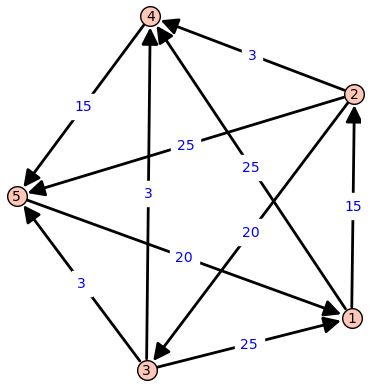

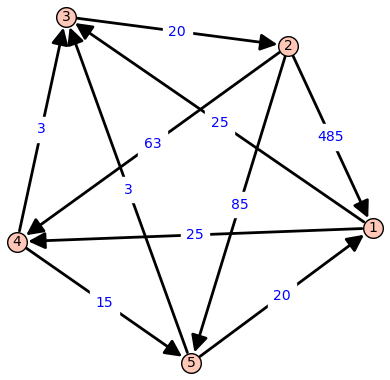

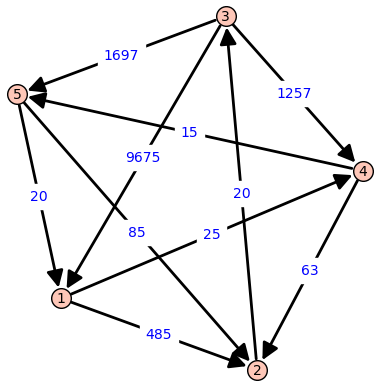

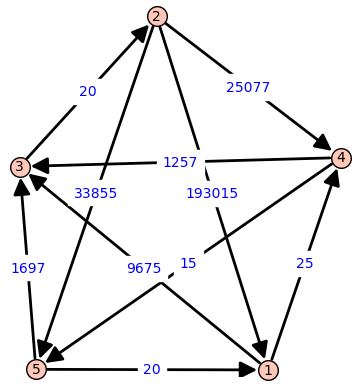

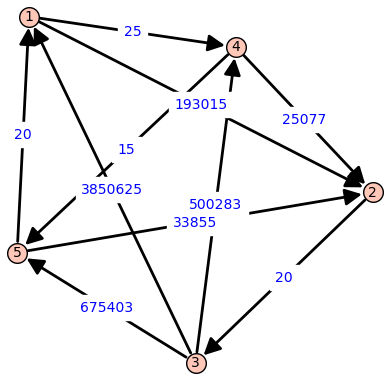

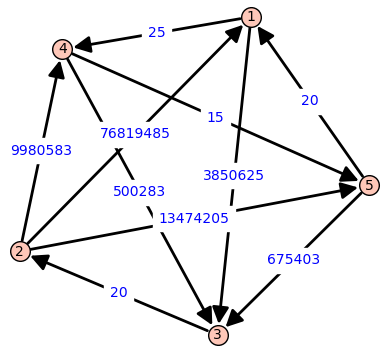

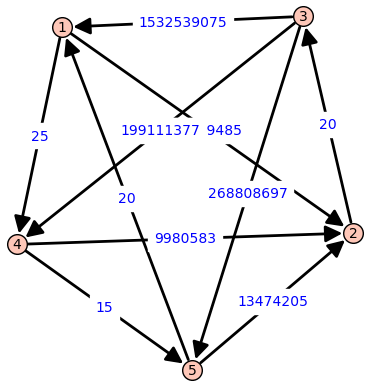

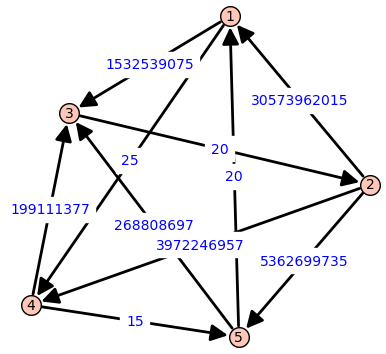

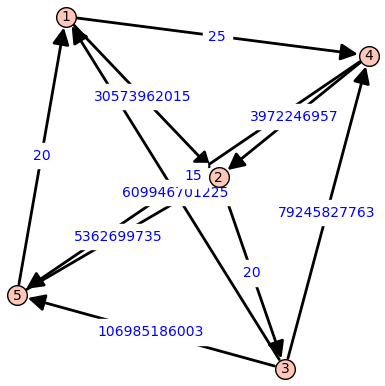

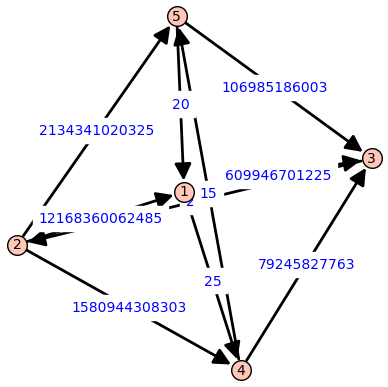

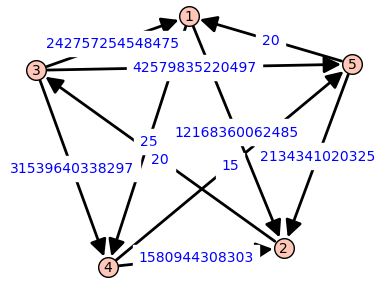

In [12]:
load("quivers.sage")
## trying to understand the 2-3 cycle

x = 3

Q = Quiver(matrix(([0, 15, -25, 25, -20],
                   [-15, 0, 20, x, 25],
                   [25, -20, 0, x, x],
                   [-25, -1*x, -1*x, 0, 15],
                   [20, -25, -1*x, -15, 0])))

nextMutation = 3

m = Q.matrix
loop = [0,0,0]
loopCount = 0
while loop[2] < 5:
    if(m[loop[0], loop[1]] > 0 and m[loop[1], loop[2]] > 0 and m[loop[2], loop[0]] > 0):
        loopCount += 1
        print(loop)
    loop[0] += 1
    if(loop[0] > 4):
        loop[0] = 1
        loop[1] += 1
        if(loop[1] > 4):
            loop[1] = 1
            loop[2] += 1

depth = 10
displayQuiver(Q.matrix)
print()
for loops in range(depth):
    Q = Q.mutate([nextMutation])
    displayQuiver(Q.matrix)
    print()
    if nextMutation == 3:
        nextMutation = 2
    else:
        nextMutation = 3

In [2]:
load("quivers.sage")
## gives better understanding, we can mutate 2-3 then 4-5 repeatedly
## seeing if works for all 0 forkless and possible 1 forkless or 2 forkless

# c>=b>=a

a = 3
b = 4
c = 5
x = 3

Q = Quiver(matrix(([0, a, -c, c, -b],
                   [-a, 0, b, x, c],
                   [c, -b, 0, x, x],
                   [-c, -1*x, -1*x, 0, a],
                   [b, -c, -1*x, -a, 0])))

for i in [1..5]:
    print(isFork(Q.mutate([i]).matrix))

    
lastMutationStarting3 = 4
lastMutationStarting4 = 3
Q3 = Q
Q4 = Q

depth = 10
for loops in range(depth):
    works3 = 0
    works4 = 0
    for i in [1..5]:
        if (not works3) and i != lastMutationStarting3 and isFork(Q3.mutate([i]).matrix) == 0:
            Q3 = Q3.mutate([i])
            works3 = i
        if (not works4) and i != lastMutationStarting4 and isFork(Q4.mutate([i]).matrix) == 0:
            Q4 = Q4.mutate([i])
            works4 = i
    print(Q3.matrix, "\n")
    ##print(Q4.matrix, "\n")
    lastMutationStarting3 = works3
    lastMutationStarting4 = works4


1
2
0
0
5
[  0 -17   5   5  -4]
[ 17   0  -4  15  17]
[ -5   4   0  -3  -3]
[ -5 -15   3   0   3]
[  4 -17   3  -3   0] 

[  0  17 -63   5  -4]
[-17   0   4 -15 -17]
[ 63  -4   0  57  65]
[ -5  15 -57   0   3]
[  4  17 -65  -3   0] 

[   0 -235   63    5   -4]
[ 235    0   -4  213  243]
[ -63    4    0  -57  -65]
[  -5 -213   57    0    3]
[   4 -243   65   -3    0] 

[   0  235 -877    5   -4]
[-235    0    4 -213 -243]
[ 877   -4    0  795  907]
[  -5  213 -795    0    3]
[   4  243 -907   -3    0] 

[    0 -3273   877     5    -4]
[ 3273     0    -4  2967  3385]
[ -877     4     0  -795  -907]
[   -5 -2967   795     0     3]
[    4 -3385   907    -3     0] 

[     0   3273 -12215      5     -4]
[ -3273      0      4  -2967  -3385]
[ 12215     -4      0  11073  12633]
[    -5   2967 -11073      0      3]
[     4   3385 -12633     -3      0] 

[     0 -45587  12215      5     -4]
[ 45587      0     -4  41325  47147]
[-12215      4      0 -11073 -12633]
[    -5 -41325  11073      0    

In [1]:
load("quivers.sage")
## gives better understanding, we can mutate 2-3 then 4-5 repeatedly
## seeing if works for all 0 forkless and possible 1 forkless or 2 forkless

## issue with understanding as if inequality is unsure, defaults to false
## i.e. if got rid of assume(a > 2), would act as if a is both negative and positive

# c>=b>=a

forget()
a,b,c,x = var('a,b,c,x')

assume(x > 1)
assume(a > 2)
assume(b > a)
assume(c > b)
assume(c-b*a > b)
assume(c-b*a > a)

Q = Quiver(matrix(([0, a, -c, c, -b],
                   [-a, 0, b, x, c],
                   [c, -b, 0, x, x],
                   [-c, -1*x, -1*x, 0, a],
                   [b, -c, -1*x, -a, 0])))

print(Q.matrix)
print()
Qp = Q.mutate([3])
Qpp = Qp.mutate([2])
Qppp = Qpp.mutate([3])
print(Qp.matrix)
print(isFork(Qp.matrix))
print()
print(Qpp.matrix)
print(isFork(Qpp.matrix))
print()
print(Qppp.matrix)
print(isFork(Qppp.matrix))

[ 0  a -c  c -b]
[-a  0  b  x  c]
[ c -b  0  x  x]
[-c -x -x  0  a]
[ b -c -x -a  0]



[                0 -b*c^2/abs(c) + a                 c                 c                -b]
[ b^2*c/abs(b) - a                 0                -b  b^2*x/abs(b) + x  b^2*x/abs(b) + c]
[               -c                 b                 0                -x                -x]
[               -c -b*x^2/abs(x) - x                 x                 0                 a]
[                b -b*x^2/abs(x) - c                 x                -a                 0]


0

[                                                 0                                   b*c^2/abs(c) - a                                                  c                                                  c                                                 -b]
[                                 -b^2*c/abs(b) + a                                                  0                                                  b                                  -b^2*x/abs(b) - x                                  -b^2*x/abs(b) - c]
[                                                -c                                                 -b                                                  0                  (b^2*x/abs(b) + x)*b^2/abs(b) - x                  (b^2*x/abs(b) + c)*b^2/abs(b) - x]
[                                                -c                                   b*x^2/abs(x) + x -(b*x^2/abs(x) + x)^2*b/abs(-b*x^2/abs(x) - x) + x                                                  0                      

2

[                                                0                                  b*c^2/abs(c) - a                                                -c                                                 c                                                -b]
[                                -b^2*c/abs(b) + a                                                 0                                                -b                                 -b^2*x/abs(b) - x                                 -b^2*x/abs(b) - c]
[                                                c                                                 b                                                 0                -(b^2*x/abs(b) + x)*b^2/abs(b) + x                -(b^2*x/abs(b) + c)*b^2/abs(b) + x]
[                                               -c                                  b*x^2/abs(x) + x (b*x^2/abs(x) + x)^2*b/abs(-b*x^2/abs(x) - x) - x                                                 0                                         

2


In [21]:
load("quivers.sage")
## gives better understanding, we can mutate 2-3 then 4-5 repeatedly
## seeing if works for all 0 forkless and possible 1 forkless or 2 forkless
##### IGNORE

# c>=b>=a

s1,s2,s3,s4,s5,s6,s7 = var('s1,s2,s3,s4,s5,s6,s7')
assume(s1 > 0)
assume(s2 > s1)
assume(s3 > s2)
assume(s4 > s3)
assume(s5 > s4)
assume(s6 > s5)
assume(s7 > s6)

Qp = Quiver(matrix(([0, s4, s2, s2, -s3],
                    [-s4, 0, -s3, s6, s7],
                    [-s2, s3, 0 , -s1, -s1],
                    [-s2, -s6, s1, 0, s5],
                    [s3, -s7, s1, -s5, 0])))

print(Qp.matrix)
print()
Qpp = Qp.mutate([2])
Qppp = Qpp.mutate([3])
print(Qp.matrix)
print()
print(Qpp.matrix)
print()
print(Qppp.matrix)

[  0  s4  s2  s2 -s3]
[-s4   0 -s3  s6  s7]
[-s2  s3   0 -s1 -s1]
[-s2 -s6  s1   0  s5]
[ s3 -s7  s1 -s5   0]



[  0  s4  s2  s2 -s3]
[-s4   0 -s3  s6  s7]
[-s2  s3   0 -s1 -s1]
[-s2 -s6  s1   0  s5]
[ s3 -s7  s1 -s5   0]

[                    0                   -s4                    s2  s4^2*s6/abs(s4) + s2  s4^2*s7/abs(s4) - s3]
[                   s4                     0                    s3                   -s6                   -s7]
[                  -s2                   -s3                     0  s3^2*s6/abs(s3) - s1  s3^2*s7/abs(s3) - s1]
[-s4*s6^2/abs(s6) - s2                    s6 -s3*s6^2/abs(s6) + s1                     0                    s5]
[-s4*s7^2/abs(s7) + s3                    s7 -s3*s7^2/abs(s7) + s1                   -s5                     0]

[                    0                   -s4                   -s2  s4^2*s6/abs(s4) + s2  s4^2*s7/abs(s4) - s3]
[                   s4                     0                   -s3                   -s6                   -s7]
[                   s2                    s3                     0 -s3^2*s6/abs(s3) + s1 -s3^2*s7/abs(s3